In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import lightgbm

In [3]:
df=pd.read_csv('labeled_data2.csv')

In [4]:
df

,Unnamed: 0,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
0,0,10.215.173.1,157.240.16.32,48924,443,6,2021-09-15 15:33:24,2525190.0,2094.495860,8.316206,...,0.000000,0.000000,126.400000,365.909091,0,10,11,1264,4025,benign
1,1,10.215.173.1,10.215.173.2,16658,53,17,2021-09-15 15:33:24,43626.0,4148.902031,45.844221,...,0.000000,0.000000,68.000000,113.000000,0,1,1,68,113,benign
2,2,10.215.173.1,157.240.16.53,37292,5222,6,2021-09-15 15:33:24,2504540.0,735.065122,9.183323,...,71225.071225,0.000000,70.454545,88.833333,0,11,12,775,1066,benign
3,3,192.168.101.162,172.217.160.162,39604,443,17,2021-09-15 15:33:24,270572.0,1075.499313,18.479370,...,0.000000,0.000000,61.666667,53.000000,0,3,2,185,106,benign
4,4,10.215.173.1,192.168.101.238,44848,53,17,2021-09-15 15:33:24,230191.0,981.793380,8.688437,...,0.000000,0.000000,77.000000,149.000000,0,1,1,77,149,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,54961,10.215.173.1,10.215.173.2,31355,53,17,2021-09-15 15:58:50,134195.0,1468.012966,14.903685,...,0.000000,0.000000,70.000000,127.000000,0,1,1,70,127,benign
54962,54962,10.215.173.1,10.215.173.2,37070,53,17,2021-09-15 15:58:50,136412.0,1187.578805,14.661467,...,0.000000,0.000000,73.000000,89.000000,0,1,1,73,89,benign
54963,54963,10.215.173.1,142.250.192.98,47991,443,17,2021-09-15 15:58:50,296628.0,31719.864612,57.310841,...,347594.111254,0.000000,649.250000,468.333333,0,8,9,5194,4215,benign
54964,54964,10.215.173.1,10.215.173.2,37982,53,17,2021-09-15 15:58:51,163704.0,891.853589,12.217172,...,0.000000,0.000000,65.000000,81.000000,0,1,1,65,81,benign


In [5]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [6]:
ack = df['ack_flag_cnt']
pd.unique(ack)

array([0], dtype=int64)

In [7]:
init = df['init_fwd_win_byts']
pd.unique(init)

array([65535,     0,  2048,  2546], dtype=int64)

In [8]:
seg = df['fwd_seg_size_min'].tolist()
pd.unique(seg)

array([20,  8])

In [9]:
iat = df['fwd_iat_tot']
pd.unique(iat)

array([ 582767.,       0.,  862174., ..., 1423555.,  238581.,  421291.])

In [10]:
flow = df['flow_duration']
pd.unique(flow)

array([2525190.,   43626., 2504540., ...,  296628.,  163704.,  570809.])

In [11]:
label = df['Label']
pd.unique(label)

array(['benign', 'attack'], dtype=object)

In [12]:
data = [df["ack_flag_cnt"], df["init_fwd_win_byts"],df["fwd_seg_size_min"], df["fwd_iat_tot"],df["flow_duration"],df["idle_max"],df["Label"]]

In [13]:
headers = ["ack", "init","seg","iat","flow","idle","label"]

In [14]:
df1 = pd.concat(data, axis=1, keys=headers)

In [15]:
df1

,ack,init,seg,iat,flow,idle,label
0,0,65535,20,582767.0,2525190.0,1941744.0,benign
1,0,0,8,0.0,43626.0,0.0,benign
2,0,65535,20,862174.0,2504540.0,1641393.0,benign
3,0,0,8,270572.0,270572.0,222756.0,benign
4,0,0,8,0.0,230191.0,0.0,benign
...,...,...,...,...,...,...,...
54961,0,0,8,0.0,134195.0,0.0,benign
54962,0,0,8,0.0,136412.0,0.0,benign
54963,0,0,8,238581.0,296628.0,87739.0,benign
54964,0,0,8,0.0,163704.0,0.0,benign


## Model Creation

In [16]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [17]:
# label encoding for Y values
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [18]:
pd.unique(df1['label'])
# 1 = Benign
# 0 = Attack

array([1, 0])

In [19]:
df1

,ack,init,seg,iat,flow,idle,label
0,0,65535,20,582767.0,2525190.0,1941744.0,1
1,0,0,8,0.0,43626.0,0.0,1
2,0,65535,20,862174.0,2504540.0,1641393.0,1
3,0,0,8,270572.0,270572.0,222756.0,1
4,0,0,8,0.0,230191.0,0.0,1
...,...,...,...,...,...,...,...
54961,0,0,8,0.0,134195.0,0.0,1
54962,0,0,8,0.0,136412.0,0.0,1
54963,0,0,8,238581.0,296628.0,87739.0,1
54964,0,0,8,0.0,163704.0,0.0,1


In [20]:
X = df1.drop('label',axis=1)
y = df1['label']

In [21]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32, shuffle=True)

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
y_train.value_counts()

0    42848
1     1124
Name: label, dtype: int64

In [24]:
type(y_train)
data=y_train.to_dict()

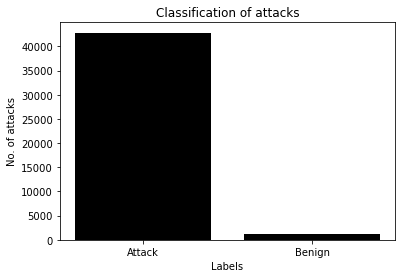

In [25]:
data = {'Attack':y_train.value_counts()[0], 'Benign':y_train.value_counts()[1]}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='black')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [26]:
# perform smote for the dataset to solve imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


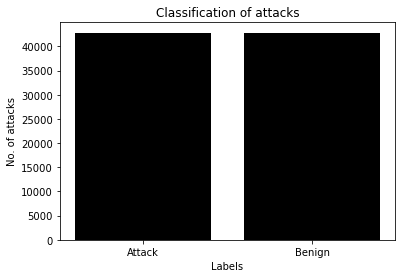

In [27]:
data = {'Attack':y_train.value_counts()[0], 'Benign':y_train.value_counts()[1]}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='black')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [28]:
y_train.value_counts()

1    42848
0    42848
Name: label, dtype: int64

In [29]:
x_train

,ack,init,seg,iat,flow,idle
0,0,65535,20,4.543000e+03,2.062015e+06,0.000000e+00
1,0,65535,20,5.663000e+03,2.024686e+06,0.000000e+00
2,0,65535,20,5.886000e+03,2.086372e+06,0.000000e+00
3,0,65535,20,1.591951e+07,1.742774e+07,1.590880e+07
4,0,65535,20,8.791000e+03,1.957401e+06,1.947936e+06
...,...,...,...,...,...,...
85691,0,0,8,0.000000e+00,9.389218e+05,0.000000e+00
85692,0,65535,20,2.342332e+05,2.342957e+06,2.069983e+06
85693,0,65535,20,8.947680e+05,3.165228e+06,2.269029e+06
85694,0,65535,20,4.210599e+06,4.210869e+06,3.852739e+06


In [30]:
# concatenate dataset for passing to pycaret
train_dataset = pd.concat([x_train,y_train],axis=1)
test_dataset = pd.concat([x_test,y_test],axis=1)

In [31]:
train_dataset

,ack,init,seg,iat,flow,idle,label
0,0,65535,20,4.543000e+03,2.062015e+06,0.000000e+00,0
1,0,65535,20,5.663000e+03,2.024686e+06,0.000000e+00,0
2,0,65535,20,5.886000e+03,2.086372e+06,0.000000e+00,0
3,0,65535,20,1.591951e+07,1.742774e+07,1.590880e+07,0
4,0,65535,20,8.791000e+03,1.957401e+06,1.947936e+06,0
...,...,...,...,...,...,...,...
85691,0,0,8,0.000000e+00,9.389218e+05,0.000000e+00,1
85692,0,65535,20,2.342332e+05,2.342957e+06,2.069983e+06,1
85693,0,65535,20,8.947680e+05,3.165228e+06,2.269029e+06,1
85694,0,65535,20,4.210599e+06,4.210869e+06,3.852739e+06,1


In [32]:
test_dataset

,ack,init,seg,iat,flow,idle,label
38466,0,65535,20,18225.0,1600134.0,1581717.0,0
39624,0,65535,20,7717.0,2260500.0,2252567.0,0
15118,0,65535,20,4121.0,1913340.0,0.0,0
29533,0,65535,20,9734.0,2039856.0,0.0,0
22011,0,65535,20,7345.0,1870652.0,0.0,0
...,...,...,...,...,...,...,...
43759,0,65535,20,36769.0,2429140.0,2391187.0,0
28641,0,65535,20,35490.0,1216453.0,1179885.0,0
16184,0,65535,20,9127.0,1988729.0,1979380.0,0
844,0,65535,20,5108.0,1856918.0,0.0,0


In [33]:
# pycaret init
exp = setup(data = train_dataset, target='label', train_size = 1.0, preprocess = True, test_data = test_dataset, session_id=1, use_gpu=True)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(85696, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9986,1.0000,0.9988,0.9984,0.9986,0.9972,0.9972
1,0.9992,1.0000,0.9998,0.9986,0.9992,0.9984,0.9984
2,0.9985,1.0000,0.9995,0.9974,0.9985,0.9970,0.9970
3,0.9988,1.0000,0.9995,0.9981,0.9988,0.9977,0.9977
4,0.9991,1.0000,0.9986,0.9995,0.9991,0.9981,0.9981
5,0.9987,1.0000,0.9988,0.9986,0.9987,0.9974,0.9974
6,0.9987,1.0000,0.9993,0.9981,0.9987,0.9974,0.9974
7,0.9986,1.0000,0.9984,0.9988,0.9986,0.9972,0.9972
8,0.9988,1.0000,0.9998,0.9979,0.9988,0.9977,0.9977
9,0.9984,1.0000,0.9993,0.9974,0.9984,0.9967,0.9967


In [35]:
filename = "xbg_model.pkl"
pickle.dump(xgb_model,open(filename,'wb'))

In [36]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

In [37]:
ada_model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9966,0.9999,0.9972,0.9960,0.9966,0.9932,0.9932
1,0.9978,1.0000,0.9991,0.9965,0.9978,0.9956,0.9956
2,0.9952,0.9998,0.9995,0.9910,0.9952,0.9904,0.9905
3,0.9973,1.0000,0.9984,0.9963,0.9973,0.9946,0.9946
4,0.9968,1.0000,0.9972,0.9965,0.9969,0.9937,0.9937
5,0.9974,0.9999,0.9979,0.9970,0.9974,0.9949,0.9949
6,0.9960,1.0000,0.9958,0.9963,0.9960,0.9921,0.9921
7,0.9965,0.9999,0.9981,0.9949,0.9965,0.9930,0.9930
8,0.9965,1.0000,0.9981,0.9949,0.9965,0.9930,0.9930
9,0.9961,0.9999,0.9986,0.9937,0.9962,0.9923,0.9923


In [38]:
filename = "ada_model.pkl"
pickle.dump(ada_model,open(filename,'wb'))

In [39]:
ada_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [40]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9986,1.0000,0.9988,0.9984,0.9986,0.9972,0.9972
1,0.9994,1.0000,1.0000,0.9988,0.9994,0.9988,0.9988
2,0.9982,0.9997,1.0000,0.9965,0.9983,0.9965,0.9965
3,0.9993,1.0000,0.9993,0.9993,0.9993,0.9986,0.9986
4,0.9991,1.0000,0.9991,0.9991,0.9991,0.9981,0.9981
5,0.9985,1.0000,0.9986,0.9984,0.9985,0.9970,0.9970
6,0.9992,0.9999,0.9998,0.9986,0.9992,0.9984,0.9984
7,0.9992,1.0000,0.9995,0.9988,0.9992,0.9984,0.9984
8,0.9992,1.0000,0.9993,0.9991,0.9992,0.9984,0.9984
9,0.9988,1.0000,1.0000,0.9977,0.9988,0.9977,0.9977


In [41]:
filename = "rf_model.pkl"
pickle.dump(rf_model,open(filename,'wb'))

In [42]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [43]:
lgbm_model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,1.0000,0.9991,0.9993,0.9992,0.9984,0.9984
1,0.9994,1.0000,0.9998,0.9991,0.9994,0.9988,0.9988
2,0.9982,1.0000,0.9995,0.9970,0.9983,0.9965,0.9965
3,0.9991,1.0000,1.0000,0.9981,0.9991,0.9981,0.9981
4,0.9987,1.0000,0.9986,0.9988,0.9987,0.9974,0.9974
5,0.9988,1.0000,0.9991,0.9986,0.9988,0.9977,0.9977
6,0.9993,1.0000,1.0000,0.9986,0.9993,0.9986,0.9986
7,0.9985,1.0000,0.9986,0.9984,0.9985,0.9970,0.9970
8,0.9992,1.0000,0.9995,0.9988,0.9992,0.9984,0.9984
9,0.9985,0.9999,0.9995,0.9974,0.9985,0.9970,0.9970


In [44]:
filename = "lgbm_model.pkl"
pickle.dump(lgbm_model,open(filename,'wb'))

In [45]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=1, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [46]:
lr_model=create_model('lr') #JUST TO CHECK IF ITS SHOWING GOOD RESULTS FOR ALL

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6635,0.8612,0.3806,0.8764,0.5308,0.3270,0.3965
1,0.6603,0.8618,0.3736,0.8758,0.5238,0.3207,0.3914
2,0.6685,0.8674,0.3972,0.8684,0.5451,0.3370,0.4012
3,0.6671,0.8662,0.3965,0.8642,0.5436,0.3342,0.3974
4,0.6705,0.8651,0.4005,0.8706,0.5486,0.3410,0.4051
5,0.6597,0.8649,0.3708,0.8784,0.5215,0.3195,0.3915
6,0.6638,0.8646,0.3791,0.8802,0.5299,0.3275,0.3984
7,0.6587,0.8600,0.3739,0.8683,0.5228,0.3173,0.3859
8,0.6638,0.8684,0.3795,0.8799,0.5302,0.3276,0.3983
9,0.6581,0.8588,0.3739,0.8664,0.5223,0.3162,0.3843


## Manual training

In [47]:
x_test

,ack,init,seg,iat,flow,idle
38466,0,65535,20,18225.0,1600134.0,1581717.0
39624,0,65535,20,7717.0,2260500.0,2252567.0
15118,0,65535,20,4121.0,1913340.0,0.0
29533,0,65535,20,9734.0,2039856.0,0.0
22011,0,65535,20,7345.0,1870652.0,0.0
...,...,...,...,...,...,...
43759,0,65535,20,36769.0,2429140.0,2391187.0
28641,0,65535,20,35490.0,1216453.0,1179885.0
16184,0,65535,20,9127.0,1988729.0,1979380.0
844,0,65535,20,5108.0,1856918.0,0.0


In [48]:
y_test

38466    0
39624    0
15118    0
29533    0
22011    0
        ..
43759    0
28641    0
16184    0
844      0
28144    1
Name: label, Length: 10994, dtype: int32

In [49]:
x_train

,ack,init,seg,iat,flow,idle
0,0,65535,20,4.543000e+03,2.062015e+06,0.000000e+00
1,0,65535,20,5.663000e+03,2.024686e+06,0.000000e+00
2,0,65535,20,5.886000e+03,2.086372e+06,0.000000e+00
3,0,65535,20,1.591951e+07,1.742774e+07,1.590880e+07
4,0,65535,20,8.791000e+03,1.957401e+06,1.947936e+06
...,...,...,...,...,...,...
85691,0,0,8,0.000000e+00,9.389218e+05,0.000000e+00
85692,0,65535,20,2.342332e+05,2.342957e+06,2.069983e+06
85693,0,65535,20,8.947680e+05,3.165228e+06,2.269029e+06
85694,0,65535,20,4.210599e+06,4.210869e+06,3.852739e+06


In [50]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
85691    1
85692    1
85693    1
85694    1
85695    1
Name: label, Length: 85696, dtype: int32

### Training Different Models

In [51]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=12,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0.8, reg_lambda=0.8, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None
                       )
xgb_clf = xgb.fit(x_train,y_train)
predictions_xgb = xgb_clf.predict(x_test)

In [52]:
cf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)
print(cf_matrix_xgb)

[[10705    10]
 [    6   273]]


<AxesSubplot:>

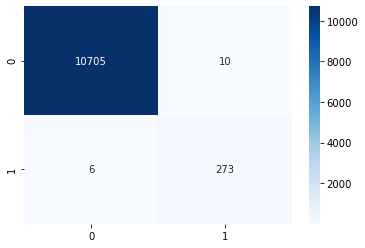

In [53]:
sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues',fmt='g')

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.96      0.98      0.97       279

    accuracy                           1.00     10994
   macro avg       0.98      0.99      0.99     10994
weighted avg       1.00      1.00      1.00     10994



In [55]:
print("xgb Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print("xgb roc_auc Score -> ",roc_auc_score(y_test,predictions_xgb))
print("f1 score ->", f1_score(y_test,predictions_xgb))

xgb Score ->  99.85446607240313
xgb roc_auc Score ->  0.9887806762703275
f1 score -> 0.9715302491103203


In [56]:
filename = "xgb_model.pkl"
pickle.dump(xgb_clf,open(filename,'wb'))

# ADA BOOST

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                           n_estimators=50, random_state=1)
ada_clf = ada.fit(x_train,y_train)
predictions_ada = ada_clf.predict(x_test)

In [59]:
cf_matrix_ada = confusion_matrix(y_test, predictions_ada)
print(cf_matrix_ada)

[[10674    41]
 [    2   277]]


<AxesSubplot:>

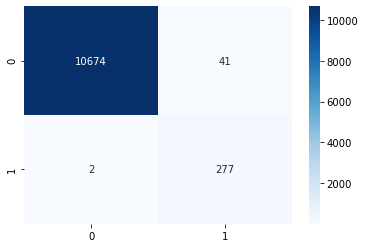

In [60]:
sns.heatmap(cf_matrix_ada, annot=True,cmap='Blues',fmt='g')

In [61]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.87      0.99      0.93       279

    accuracy                           1.00     10994
   macro avg       0.94      0.99      0.96     10994
weighted avg       1.00      1.00      1.00     10994



In [62]:
print("ada Score -> ",accuracy_score(predictions_ada, y_test)*100)
print("ada roc_auc Score -> ",roc_auc_score(y_test,predictions_ada))
print("ada f1 score ->", f1_score(y_test,predictions_ada))

ada Score ->  99.60887756958341
ada roc_auc Score ->  0.9945025648230382
ada f1 score -> 0.9279731993299833


In [63]:
filename = "ada_model.pkl"
pickle.dump(ada_clf,open(filename,'wb'))

# RF

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=400)
rf_clf = rf.fit(x_train,y_train)
predictions_rf = rf_clf.predict(x_test)

In [65]:
cf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print(cf_matrix_rf)

[[10703    12]
 [    5   274]]


<AxesSubplot:>

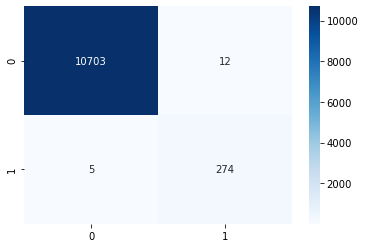

In [66]:
sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues',fmt='g')

In [67]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.96      0.98      0.97       279

    accuracy                           1.00     10994
   macro avg       0.98      0.99      0.98     10994
weighted avg       1.00      1.00      1.00     10994



In [68]:
print("rf Score -> ",accuracy_score(predictions_rf, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_rf))
print("rf f1 score ->", f1_score(y_test,predictions_rf))

rf Score ->  99.84537020192833
rf roc_auc Score ->  0.9904794638541422
rf f1 score -> 0.9699115044247787


In [69]:
filename = "rf_model.pkl"
pickle.dump(rf_clf,open(filename,'wb'))

# LGBM

In [70]:
lgbm = lightgbm.LGBMClassifier(max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0)
lgbm_clf = lgbm.fit(x_train,y_train)
predictions_lgbm = lgbm_clf.predict(x_test)

In [71]:
cf_matrix_lgbm = confusion_matrix(y_test, predictions_lgbm)
print(cf_matrix_lgbm)

[[10704    11]
 [    6   273]]


<AxesSubplot:>

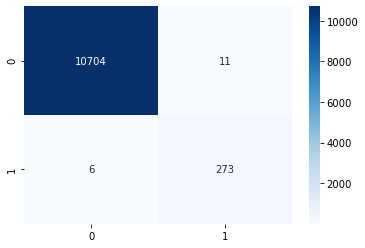

In [72]:
sns.heatmap(cf_matrix_lgbm, annot=True,cmap='Blues',fmt='g')

In [73]:
print("rf Score -> ",accuracy_score(predictions_lgbm, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_lgbm))
print("rf f1 score ->", f1_score(y_test,predictions_lgbm))

rf Score ->  99.84537020192833
rf roc_auc Score ->  0.9887340127145646
rf f1 score -> 0.9698046181172291


In [74]:
filename = "lgbm_model.pkl"
pickle.dump(lgbm_clf,open(filename,'wb'))